In [7]:
import pandas as pd
from sklearn import preprocessing as prep
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
test.head()
#test.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Visualize the shape of data, the type of data , the missing values , unique counts , and build a data dictionary dataframe.   

In [6]:
train.shape

(891, 12)

In [25]:
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(train.dtypes)
Data_dict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [26]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = train.isnull().sum()
Data_dict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [27]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.

Data_dict['UniqueVal'] = train.nunique()
Data_dict

,0,MissingVal,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [29]:
# identifying count of the variable.

Data_dict['Count'] = train.count()
Data_dict

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [32]:
# renaming the first column using rename()

Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


## Run discriptive statistics on objects and other  numerical datatypes.

In [3]:
# get discriptive statistics on "objects" datatypes
train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lefebre, Miss. Mathilde",male,1601,B96 B98,S
freq,1,577,7,4,644


In [6]:
# get discriptive statistics on "number" datatypes
train.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Applying Univariate and Multivariate Data Analysis using graphical representations

### Univariate Data Analysis

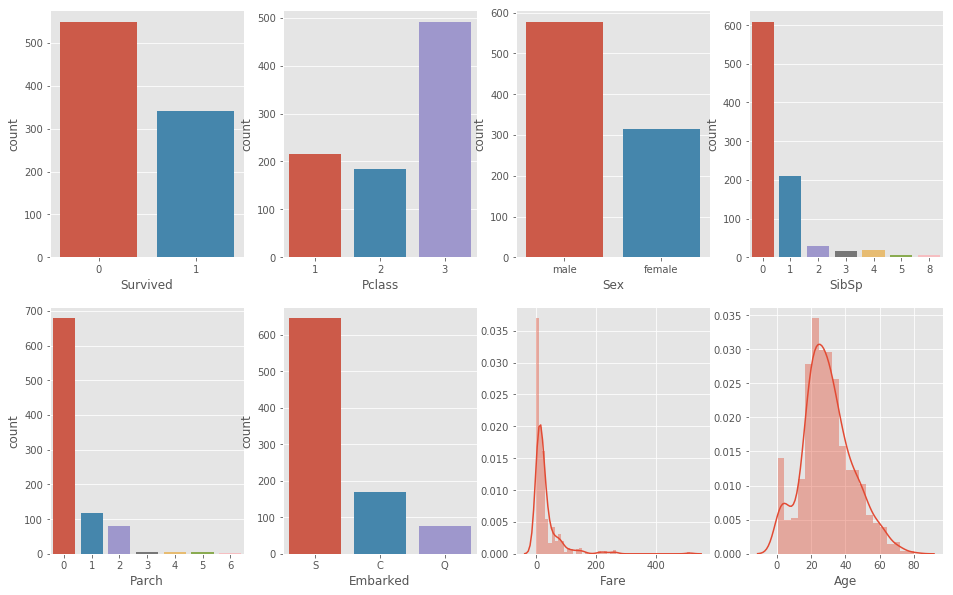

In [7]:
fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = train, ax = axes[0,0])
sns.countplot('Pclass' , data = train, ax = axes[0,1])
sns.countplot('Sex' , data = train, ax = axes[0,2])
sns.countplot('SibSp' , data = train, ax = axes[0,3])
sns.countplot('Parch' , data = train, ax = axes[1,0])
sns.countplot('Embarked' , data = train, ax = axes[1,1])
sns.distplot(train['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(train['Age'].dropna() , kde = True , ax = axes[1,3])

### Bivariate Data Analysis

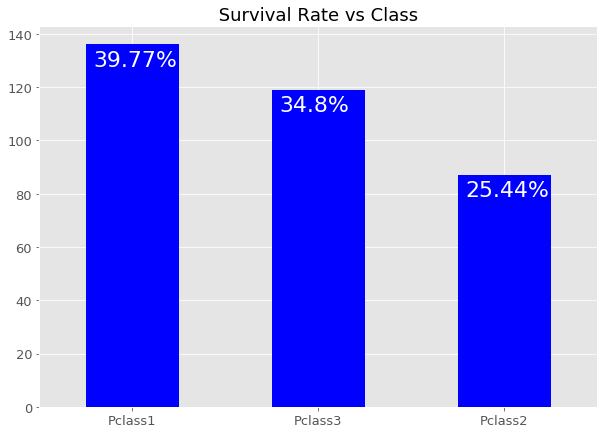

In [22]:
Pclass_survival = train[train.Survived == 1]
Pclass_survival.head()
ax = Pclass_survival.Pclass.value_counts().plot(kind='bar', figsize=(10,7),fontsize=13,color = 'blue');
plt.xticks(np.arange(3), ['Pclass1' , 'Pclass3','Pclass2'] , rotation = 0)
ax.set_alpha(0.8)
ax.set_title(" Survival Rate vs Class ", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')


### Joint Plot 

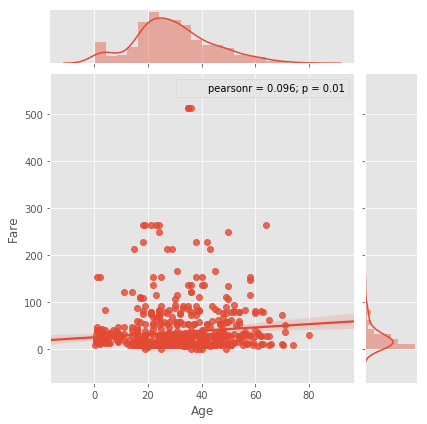

In [50]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = train, kind = 'reg');

## Multivariate Data Analysis

### There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

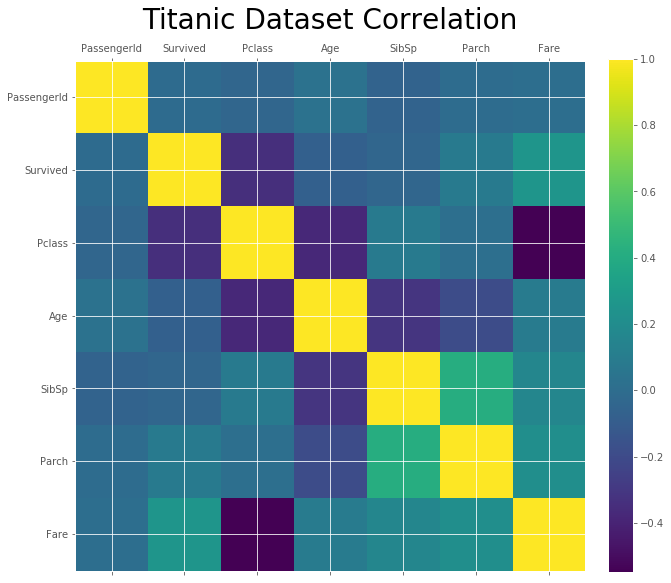

In [75]:
# For multivariate data analysis I've used pandas "correlation matrix" . You can also use seaborn "heatmap".
def plotting_corr( train , size = 10):
    corr = train.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(train , size = 10)


## Feature Engineering on Titanic Dataset

In [3]:
# concate test and train dataset

titanic_dataset = train.append(test , ignore_index = True)
titanic_dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [6]:
# shape of titanic dataset
titanic_dataset.shape

(1309, 12)

In [9]:
titanic_dataset.Sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
# creating a label encoder which encodes integer features using one hot encoding

le = prep.LabelEncoder()

In [13]:
#fitting label encoder
le.fit(titanic_dataset.Sex)
le.classes_

array(['female', 'male'], dtype=object)

In [15]:
#transforming labels to normalised encoding "1" for male & "0" for female.
Sex_le = le.transform(titanic_dataset.Sex)
Sex_le[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [17]:
# creating a copy of the original dataset
titanic_dataset_le = titanic_dataset.copy()
titanic_dataset_le.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [19]:
# Replacing the "Sex" column with normalised values(Sex_le)
titanic_dataset_le.Sex = Sex_le
titanic_dataset_le.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [24]:
titanic_dataset.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [26]:
print(titanic_dataset.Age.unique())
print(titanic_dataset.Cabin.unique())
print(titanic_dataset.Fare.unique())
print(titanic_dataset.Parch.unique())
print(titanic_dataset.PassengerId.unique())
print(titanic_dataset.Pclass.unique())
print(titanic_dataset.Sex.unique())
print(titanic_dataset.SibSp.unique())
print(titanic_dataset.Embarked.unique())

[ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.    22.5   18.5   67.    76.    26.5   60.5   11.5    0.33
   0.17  38.5 ]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C

In [28]:
# remove nans and fill it with '0's
embarked = titanic_dataset['Embarked'].fillna('0')
embarked.unique()

array(['S', 'C', 'Q', '0'], dtype=object)